In [56]:
import cmdstanpy
cmdstanpy.install_cmdstan()

from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

Installing CmdStan version: 2.32.1
Install directory: /root/.cmdstan
CmdStan version 2.32.1 already installed


Lab 6 - Model comparison

Ex 1 - generate data

In [57]:
F = len('Dorota')
L = len('Kowalczyk')
N = (L+F)*100


In [58]:
model1 = CmdStanModel(stan_file='code_1.stan')
sample1 = model1.sample(data = {'N': N},
                        iter_sampling=1,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1)

df1 = sample1.draws_pd()
df_1 = df1.loc[0,'y[1]':f"y[{N}]"].values
df1

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsczhui2w/nlkcpzoi.json
DEBUG:cmdstanpy:cmd: /content/code_1 info
cwd: None
20:00:27 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_1', 'id=1', 'random', 'seed=51552', 'data', 'file=/tmp/tmpsczhui2w/nlkcpzoi.json', 'output', 'file=/tmp/tmpsczhui2w/code_1szmitd2c/code_1-20230504200027.csv', 'method=sample', 'num_samples=1', 'num_warmup=0', 'algorithm=fixed_param']


20:00:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_1', 'id=1', 'random', 'seed=51552', 'data', 'file=/tmp/tmpsczhui2w/nlkcpzoi.json', 'output', 'file=/tmp/tmpsczhui2w/code_1szmitd2c/code_1-20230504200027.csv', 'method=sample', 'num_samples=1', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsczhui2w/code_1szmitd2c/code_1-20230504200027.csv
 console_msgs (if any):
	/tmp/tmpsczhui2w/code_1szmitd2c/code_1-20230504200027_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
  

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,0.01,0.756254,-0.251565,0.915349,-0.105025,-1.87849,0.406978,-0.788785,...,-0.118649,-0.765081,-0.787866,0.752956,-1.06454,0.070748,0.321412,-0.5683,-0.115948,-0.569368


In [67]:
model2 = CmdStanModel(stan_file='code_2.stan')
sample2 = model2.sample(data = {'N': N},
                        iter_sampling=1,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1)

df2 = sample2.draws_pd()
df_2 = df2.loc[0,'y[1]':f"y[{N}]"].values

df2

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsczhui2w/_qxpf9c_.json
DEBUG:cmdstanpy:cmd: /content/code_2 info
cwd: None
20:09:57 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_2', 'id=1', 'random', 'seed=57989', 'data', 'file=/tmp/tmpsczhui2w/_qxpf9c_.json', 'output', 'file=/tmp/tmpsczhui2w/code_2sgjt7t1v/code_2-20230504200957.csv', 'method=sample', 'num_samples=1', 'num_warmup=0', 'algorithm=fixed_param']


20:09:57 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_2', 'id=1', 'random', 'seed=57989', 'data', 'file=/tmp/tmpsczhui2w/_qxpf9c_.json', 'output', 'file=/tmp/tmpsczhui2w/code_2sgjt7t1v/code_2-20230504200957.csv', 'method=sample', 'num_samples=1', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsczhui2w/code_2sgjt7t1v/code_2-20230504200957.csv
 console_msgs (if any):
	/tmp/tmpsczhui2w/code_2sgjt7t1v/code_2-20230504200957_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
  

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,-1.52087,-1.00249,-0.004148,-0.452487,0.530152,-1.67858,-0.147493,-0.48161,...,5.09252,0.130958,0.551146,-1.29416,0.052081,-4.26133,-0.081935,2.14614,-2.56209,-2.01976


Ex 2 - compare normal and student models for data from first file

In [60]:
model3 = CmdStanModel(stan_file='code_3.stan')
sample3 = model3.sample(data = {'N': N, 'y': df_1},
                        iter_sampling=1000,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1,
                        seed=28052020)

df3 = sample3.draws_pd()
df3.head()

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsczhui2w/p2ny4ugu.json
DEBUG:cmdstanpy:cmd: /content/code_3 info
cwd: None
20:00:28 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_3', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpsczhui2w/p2ny4ugu.json', 'output', 'file=/tmp/tmpsczhui2w/code_3zb0vmzd6/code_3-20230504200028.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


20:00:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_3', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpsczhui2w/p2ny4ugu.json', 'output', 'file=/tmp/tmpsczhui2w/code_3zb0vmzd6/code_3-20230504200028.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsczhui2w/code_3zb0vmzd6/code_3-20230504200028.csv
 console_msgs (if any):
	/tmp/tmpsczhui2w/code_3zb0vmzd6/code_3-20230504200028_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t

,lp__,accept_stat__,sigma,mu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],log_lik[6],...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
0,0.0,0.0,1.10825,-1.7918,-3.6648,-1.98747,-4.00516,-2.17998,-1.02478,-2.98986,...,-1.359490,-1.590560,-0.621586,-2.006780,-0.889065,-3.38127,-1.844180,-2.201380,-2.073870,-3.391700
1,0.0,0.0,1.10825,-1.7918,-3.6648,-1.98747,-4.00516,-2.17998,-1.02478,-2.98986,...,-0.541583,-3.107900,-0.381895,-0.338901,-2.684270,-4.45899,-3.570320,-0.227332,-1.332160,-4.417490
2,0.0,0.0,1.10825,-1.7918,-3.6648,-1.98747,-4.00516,-2.17998,-1.02478,-2.98986,...,-2.867170,-3.204440,-1.852770,-2.050840,-2.508550,-2.04052,-1.291370,-1.257800,0.089988,0.072988
3,0.0,0.0,1.10825,-1.7918,-3.6648,-1.98747,-4.00516,-2.17998,-1.02478,-2.98986,...,0.854970,-2.025400,0.209541,-1.718940,-0.555144,-1.66513,-0.847279,-1.278180,-1.685450,-2.402830
4,0.0,0.0,1.10825,-1.7918,-3.6648,-1.98747,-4.00516,-2.17998,-1.02478,-2.98986,...,-2.022850,-0.630165,0.376301,-2.073690,-0.420732,-1.26021,-1.397320,-2.236800,-2.626670,-1.892990


In [61]:
model4 = CmdStanModel(stan_file='code_4.stan')
sample4 = model4.sample(data = {'N': N, 'y': df_1},
                        iter_sampling=1000,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1,
                        seed=28052020)

df4 = sample4.draws_pd()
df4.head()

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsczhui2w/olcphedz.json
DEBUG:cmdstanpy:cmd: /content/code_4 info
cwd: None
20:00:32 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_4', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpsczhui2w/olcphedz.json', 'output', 'file=/tmp/tmpsczhui2w/code_4yon409f8/code_4-20230504200032.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


20:00:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_4', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpsczhui2w/olcphedz.json', 'output', 'file=/tmp/tmpsczhui2w/code_4yon409f8/code_4-20230504200032.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsczhui2w/code_4yon409f8/code_4-20230504200032.csv
 console_msgs (if any):
	/tmp/tmpsczhui2w/code_4yon409f8/code_4-20230504200032_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t

,lp__,accept_stat__,sigma,mu,nu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
0,0.0,0.0,1.10825,-1.7918,0.141843,-3.94405,-3.39459,-4.0115,-3.49184,-1.88738,...,-374.62000,-4.212910e+00,4.224870e-01,-4.249690e+02,-1.10256,-1.482340,-3.234020e+00,55.02240,-3.864890e+00,-5.33404
1,0.0,0.0,1.10825,-1.7918,0.141843,-3.94405,-3.39459,-4.0115,-3.49184,-1.88738,...,-198.41000,-9.284160e+08,-1.858900e+08,-4.044990e+06,-55831.10000,-6350.950000,-3.544590e+06,8445.01000,4.670030e+06,-21420.60000
2,0.0,0.0,1.10825,-1.7918,0.141843,-3.94405,-3.39459,-4.0115,-3.49184,-1.88738,...,55988.70000,-1.876910e+01,-5.852870e+05,1.063540e+00,-2.23474,-1.193140,2.181320e+03,-35.00240,-2.304340e+00,-435.69600
3,0.0,0.0,1.10825,-1.7918,0.141843,-3.94405,-3.39459,-4.0115,-3.49184,-1.88738,...,-33.32200,1.177860e+02,-1.687520e+00,2.489320e+02,-887.30100,102954.000000,-1.269780e+04,-1533.85000,-1.125410e+05,57.93880
4,0.0,0.0,1.10825,-1.7918,0.141843,-3.94405,-3.39459,-4.0115,-3.49184,-1.88738,...,-1.22258,5.882780e+01,5.956810e+01,-1.963710e+00,6781.48000,-0.644752,-4.089890e+02,-2.20306,-1.675810e+05,1168.16000


In [62]:
fit_normal = az.from_cmdstanpy(posterior=sample3)
fit_chi = az.from_cmdstanpy(posterior=sample4)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


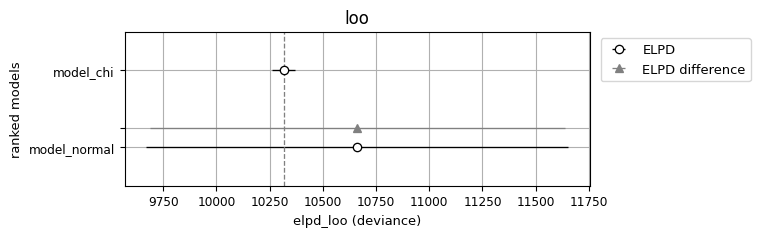

In [63]:
loo = az.compare({'model_normal': fit_normal, 'model_chi': fit_chi}, ic='loo', scale='deviance')
az.plot_compare(loo)
plt.title('loo')
plt.grid(True)
plt.show()

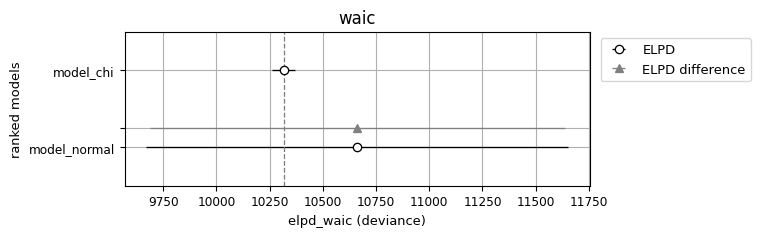

In [64]:
waic = az.compare({'model_normal': fit_normal, 'model_chi': fit_chi}, ic='waic', scale='deviance')
az.plot_compare(waic)
plt.title('waic')
plt.grid(True)
plt.show()

Ex 3 - compare models with different numbers of predictors

In [69]:
model5 = CmdStanModel(stan_file='code_5.stan')

predictors_number = [1, 2, 3]
samples_list = list()

for K in predictors_number:

    X = df2.loc[:, 'X[1,1]':f'X[{N},{K}]'].values.reshape((N, K))

    sample5 = model5.sample(data = {'N': N, 'K': K, 'y': df_2, 'X': X},
                        iter_sampling=1000,
                        fixed_param=True, 
                        iter_warmup=0, 
                        chains=1)
    
    samples_list.append(sample5)

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsczhui2w/w2xl1zgp.json
DEBUG:cmdstanpy:cmd: /content/code_5 info
cwd: None
20:10:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=1', 'random', 'seed=56225', 'data', 'file=/tmp/tmpsczhui2w/w2xl1zgp.json', 'output', 'file=/tmp/tmpsczhui2w/code_5hgxb7ukx/code_5-20230504201019.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


20:10:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_5', 'id=1', 'random', 'seed=56225', 'data', 'file=/tmp/tmpsczhui2w/w2xl1zgp.json', 'output', 'file=/tmp/tmpsczhui2w/code_5hgxb7ukx/code_5-20230504201019.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsczhui2w/code_5hgxb7ukx/code_5-20230504201019.csv
 console_msgs (if any):
	/tmp/tmpsczhui2w/code_5hgxb7ukx/code_5-20230504201019_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 =

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsczhui2w/0k0rp1rw.json
DEBUG:cmdstanpy:cmd: /content/code_5 info
cwd: None
20:10:21 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=1', 'random', 'seed=25871', 'data', 'file=/tmp/tmpsczhui2w/0k0rp1rw.json', 'output', 'file=/tmp/tmpsczhui2w/code_5rgsd1j0h/code_5-20230504201022.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


20:10:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_5', 'id=1', 'random', 'seed=25871', 'data', 'file=/tmp/tmpsczhui2w/0k0rp1rw.json', 'output', 'file=/tmp/tmpsczhui2w/code_5rgsd1j0h/code_5-20230504201022.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsczhui2w/code_5rgsd1j0h/code_5-20230504201022.csv
 console_msgs (if any):
	/tmp/tmpsczhui2w/code_5rgsd1j0h/code_5-20230504201022_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 =

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsczhui2w/l_glksf4.json
DEBUG:cmdstanpy:cmd: /content/code_5 info
cwd: None
20:10:24 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=1', 'random', 'seed=65339', 'data', 'file=/tmp/tmpsczhui2w/l_glksf4.json', 'output', 'file=/tmp/tmpsczhui2w/code_5nxqa7_q3/code_5-20230504201024.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


20:10:27 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_5', 'id=1', 'random', 'seed=65339', 'data', 'file=/tmp/tmpsczhui2w/l_glksf4.json', 'output', 'file=/tmp/tmpsczhui2w/code_5nxqa7_q3/code_5-20230504201024.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpsczhui2w/code_5nxqa7_q3/code_5-20230504201024.csv
 console_msgs (if any):
	/tmp/tmpsczhui2w/code_5nxqa7_q3/code_5-20230504201024_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 =

In [70]:
compare_dict = dict()

for i in range(len(predictors_number)):
    
    compare_dict[f'model with "{predictors_number[i]}" predictor/s'] = samples_list[i]

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated

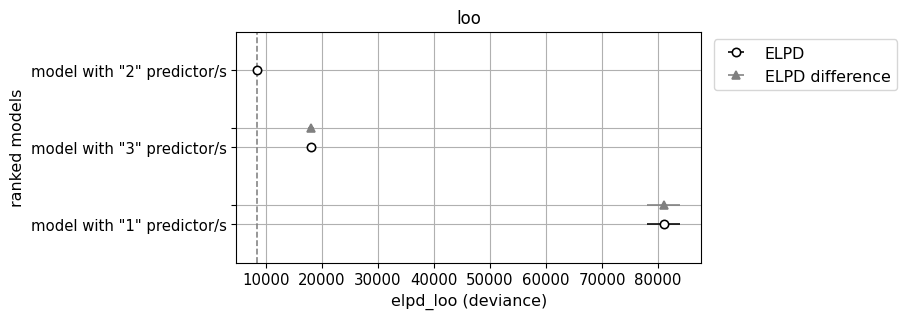

In [72]:
loo = az.compare(compare_dict, ic='loo', scale='deviance')
az.plot_compare(loo)
plt.title('loo')
plt.grid(True)
plt.show()

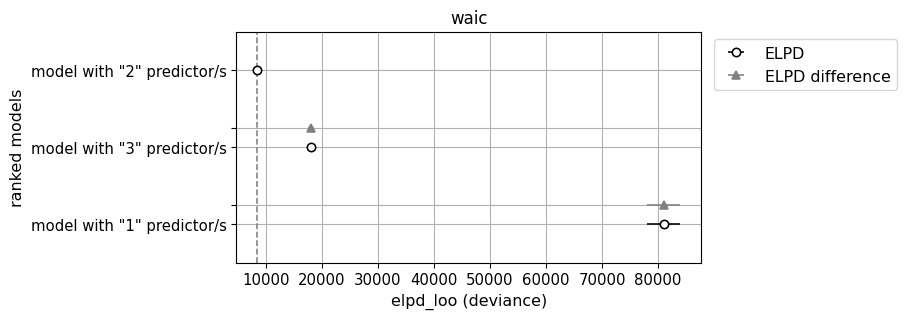

In [73]:
waic = az.compare(compare_dict, ic='waic', scale='deviance')
az.plot_compare(loo)
plt.title('waic')
plt.grid(True)
plt.show()